In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, re, os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor

In [2]:
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [4]:
chdir = True

In [5]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [6]:
from IPython.display import IFrame
IFrame("../assets/testbed.png", width=850, height=480)

In [167]:
current_dir = os.getcwd()
folder_path = os.path.join(current_dir, '../linear/datasets_pcm/')
file_template = 'random_input_exp-{}.csv'
num_files = [10,7,8,3]

combined_data = pd.DataFrame()

for i in num_files:
    file_path = os.path.join(folder_path, file_template.format(i))
    if os.path.exists(file_path):
        data = pd.read_csv(file_path, index_col=0)

        data = data.replace(['<not counted>'], np.nan)
        # data = data.dropna()

        combined_data = pd.concat([combined_data, data])
    else:
        print(f"File {file_path} does not exist.")

print(combined_data.info())
combined_data

C:\Users\Qiong\AppData\Local\Temp\ipykernel_12984\799532979.py:11: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, index_col=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21958 entries, 0 to 7135
Columns: 201 entries, input_rate to ndpi_stats-pcm_processed_Core5 (Socket 0)-INSTnom%
dtypes: float64(197), int64(1), object(3)
memory usage: 33.8+ MB
None


,input_rate,output_rate,latency,ndpi_stats-pcm_processed_System-Date,ndpi_stats-pcm_processed_System-Time,ndpi_stats-pcm_processed_Socket 0-EXEC,ndpi_stats-pcm_processed_Socket 0-IPC,ndpi_stats-pcm_processed_Socket 0-FREQ,ndpi_stats-pcm_processed_Socket 0-AFREQ,ndpi_stats-pcm_processed_Socket 0-L3MISS,...,ndpi_stats-pcm_processed_Core5 (Socket 0)-C6res%,ndpi_stats-pcm_processed_Core5 (Socket 0)-C7res%,ndpi_stats-pcm_processed_Core5 (Socket 0)-TEMP,ndpi_stats-pcm_processed_Core5 (Socket 0)-INST,ndpi_stats-pcm_processed_Core5 (Socket 0)-ACYC,ndpi_stats-pcm_processed_Core5 (Socket 0)-TIME(ticks),ndpi_stats-pcm_processed_Core5 (Socket 0)-PhysIPC,ndpi_stats-pcm_processed_Core5 (Socket 0)-PhysIPC%,ndpi_stats-pcm_processed_Core5 (Socket 0)-INSTnom,ndpi_stats-pcm_processed_Core5 (Socket 0)-INSTnom%
0,665.402799,426.405711,15000.000,2024-02-29,21:46:59.763,0.29,2.74,0.11,1.12,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,478.600793,539.039886,6.727,2024-02-29,21:47:00.764,0.15,2.26,0.06,1.12,0.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,604.027316,520.755843,6.266,2024-02-29,21:47:01.763,0.15,2.22,0.07,1.12,0.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,663.179272,667.905782,6.883,2024-02-29,21:47:02.763,0.15,2.27,0.07,1.12,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299.658794,2960.075672,208.656,2024-02-29,21:47:03.763,0.15,2.34,0.06,1.12,0.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7131,4782.642932,4782.506331,26.874,2024-02-27,13:24:27.014,0.17,2.87,0.06,1.12,0.04,...,0.0,0.0,35.0,1294.32,411.98,2598.10,6.28,157.09,1.00,24.91
7132,4784.874094,4784.513564,17.315,2024-02-27,13:24:28.021,0.17,2.61,0.07,1.12,0.12,...,0.0,0.0,35.0,1307.77,411.51,2607.13,6.36,158.90,1.00,25.08
7133,4783.813934,4784.375277,13.043,2024-02-27,13:24:29.018,0.18,2.72,0.07,1.12,0.06,...,0.0,0.0,35.0,1325.66,414.45,2595.84,6.40,159.93,1.02,25.53
7134,4784.331810,4784.176044,10.765,2024-02-27,13:24:30.018,0.18,2.94,0.06,1.12,0.02,...,0.0,0.0,35.0,1327.17,400.56,2598.17,6.63,165.66,1.02,25.54


In [137]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets_pcm/random_input_exp-7.csv')

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Columns: 169 entries, input_rate to packetsize
dtypes: float64(166), int64(1), object(2)
memory usage: 1.9+ MB


In [168]:
data["ndpi_stats-pcm_processed_Socket 0-L3MPI"] = data["ndpi_stats-pcm_processed_Socket 0-L3MPI"].astype(float)
#print(data["ndpi_stats-pcm_processed_Socket 0-L3MPI"])

In [169]:
corr = data.corr()

corr_list = []
for i in range(1,2):  # Iterate through all but the last column
    for j in range(i+1, len(corr.columns)):  # Compare with subsequent columns
        # Only add to the list if absolute correlation is greater than 0.76
        if abs(corr.iloc[i, j]) > 0.7:
            corr_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))

# No need to sort if you're only interested in correlations greater than 0.76
for correlation in corr_list:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

C:\Users\Qiong\AppData\Local\Temp\ipykernel_12984\3629328052.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-EXEC: 0.78
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-IPC: 0.80
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-L2MISS: 0.84
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-L2MPI: 0.84
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-WRITE: 0.79
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-INST: 0.79
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-PhysIPC: 0.80
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-PhysIPC%: 0.80
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-INSTnom: 0.79
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-INSTnom%: 0.79
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 1-L2MISS: 0.79
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 1-L2MPI: 0.76
Correlat

In [170]:
# Filter out specific items from the list


corr_throughput = [item[1] for item in corr_list if item[1] not in ["tx_stats_Mbit","tx_stats_PacketRate", "tx_stats_MbitWithFraming", "packetsize"]]
print(corr_throughput)


['ndpi_stats-pcm_processed_Socket 0-EXEC', 'ndpi_stats-pcm_processed_Socket 0-IPC', 'ndpi_stats-pcm_processed_Socket 0-L2MISS', 'ndpi_stats-pcm_processed_Socket 0-L2MPI', 'ndpi_stats-pcm_processed_Socket 0-WRITE', 'ndpi_stats-pcm_processed_Socket 0-INST', 'ndpi_stats-pcm_processed_Socket 0-PhysIPC', 'ndpi_stats-pcm_processed_Socket 0-PhysIPC%', 'ndpi_stats-pcm_processed_Socket 0-INSTnom', 'ndpi_stats-pcm_processed_Socket 0-INSTnom%', 'ndpi_stats-pcm_processed_Socket 1-L2MISS', 'ndpi_stats-pcm_processed_Socket 1-L2MPI', 'ndpi_stats-pcm_processed_Socket 1-READ', 'ndpi_stats-pcm_processed_DRAM Energy (Joules)-SKT1', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-EXEC', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-IPC', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-L2MISS', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-L2MPI', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-INST', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-PhysIPC', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-PhysIPC%', 'ndpi_stats-pcm_proc

# RNN (timewindow=1)

In [171]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_absolute_error

import numpy as np

In [172]:
# training  

X = data[corr_throughput]
y = data['output_rate']

#shift one point for prediction
# Define the split point

y_shifted = y.shift(-1).dropna()
X_adjusted = X.iloc[:-1]
split_point_adjusted = int(len(X_adjusted) * 0.7)

# Split the data sequentially with the adjusted indices.
X_train_seq = X_adjusted.iloc[:split_point_adjusted]
X_test_seq = X_adjusted.iloc[split_point_adjusted:]
y_train_seq = y_shifted.iloc[:split_point_adjusted]
y_test_seq = y_shifted.iloc[split_point_adjusted:]


# Split the data sequentially
#X_train_seq = X.iloc[:split_point]
#X_test_seq = X.iloc[split_point:]
#y_train_seq = y.iloc[:split_point]
#y_test_seq = y.iloc[split_point:]


# 
X_train_np = X_train_seq.to_numpy().reshape((X_train_seq.shape[0], 1, X_train_seq.shape[1]))
X_test_np = X_test_seq.to_numpy().reshape((X_test_seq.shape[0], 1, X_test_seq.shape[1]))
y_train_np = y_train_seq.to_numpy()
y_test_np = y_test_seq.to_numpy()

# train the regressor
model = Sequential()
#model.add(SimpleRNN(units=50, activation='relu', input_shape=(1, len(corr_throughput))))  
model.add(LSTM(units=50, activation='relu', input_shape=(1, len(corr_throughput))))  
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_np, y_train_np, epochs=100, validation_split=0.2, verbose=1)

# Evaluate the model on test data
test_loss = model.evaluate(X_test_np, y_test_np, verbose = 1)

y_pred_np = model.predict(X_test_np)

mae = mean_absolute_error(y_test_np, y_pred_np)
mse = mean_squared_error(y_test_np, y_pred_np)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np,y_pred_np)




Epoch 1/100
125/125 [==============================] - 2s 5ms/step - loss: 12231898.0000 - val_loss: 6184101.5000
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 4264050.5000 - val_loss: 3657730.5000
Epoch 3/100
125/125 [==============================] - 0s 4ms/step - loss: 3331281.0000 - val_loss: 3312496.2500
Epoch 4/100
125/125 [==============================] - 1s 6ms/step - loss: 2923618.5000 - val_loss: 2887942.2500
Epoch 5/100
125/125 [==============================] - 0s 4ms/step - loss: 2440980.2500 - val_loss: 2408575.2500
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 1935282.8750 - val_loss: 1964933.1250
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 1505857.1250 - val_loss: 1653131.1250
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 1234398.5000 - val_loss: 1495471.7500
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 1104224.5000 - val_l

125/125 [==============================] - 0s 3ms/step - loss: 929412.3125 - val_loss: 1342188.5000
Epoch 74/100
125/125 [==============================] - 0s 3ms/step - loss: 925831.4375 - val_loss: 1340974.2500
Epoch 75/100
125/125 [==============================] - 0s 4ms/step - loss: 927466.7500 - val_loss: 1338481.0000
Epoch 76/100
125/125 [==============================] - 0s 4ms/step - loss: 928386.0000 - val_loss: 1350286.0000
Epoch 77/100
125/125 [==============================] - 1s 4ms/step - loss: 924452.3125 - val_loss: 1336416.8750
Epoch 78/100
125/125 [==============================] - 1s 4ms/step - loss: 922573.5625 - val_loss: 1337487.8750
Epoch 79/100
125/125 [==============================] - 0s 4ms/step - loss: 920615.8750 - val_loss: 1343722.1250
Epoch 80/100
125/125 [==============================] - 0s 3ms/step - loss: 921116.3750 - val_loss: 1343558.2500
Epoch 81/100
125/125 [==============================] - 0s 4ms/step - loss: 919053.3750 - val_loss: 1340289.0

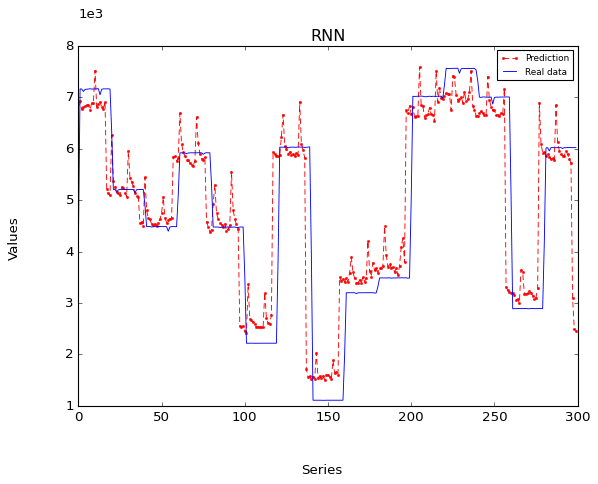

Accuracy within 5% threshold: [39.74778141]
Time window=1 :[0.0, 58.664175618869685, 74.40448388603457, 82.71835590845399, 88.41662774404485, 91.82624941616068, 93.92807099486221, 95.28257823446987, 96.26342830453059, 96.49696403549743, 96.91732835123774]


In [174]:
# plot
import matplotlib.ticker as mticker

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred_np[0:300], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test_np.tolist()[0:300], c='b',linestyle='-',linewidth = 0.8,label='Real data')
plt.title("RNN")

plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()

#accuracy
threshold = 0.05 
y_pred_flat = [item[0] for item in y_pred_np.tolist()]

distances = [abs(real - pred) / real for real, pred in zip(y_test_np.tolist(),y_pred_np)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test_np.tolist(), y_pred_flat)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(f'Time window=1 :{accuracy_cdf}')

# If the time window is flexiable, can accuracy can be improved?


In [69]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets_pcm/random_input_exp-7.csv')

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Columns: 169 entries, input_rate to packetsize
dtypes: float64(166), int64(1), object(2)
memory usage: 1.9+ MB


In [175]:
print(data.columns)


Index(['input_rate', 'output_rate', 'latency',
       'ndpi_stats-pcm_processed_System-Date',
       'ndpi_stats-pcm_processed_System-Time',
       'ndpi_stats-pcm_processed_Socket 0-EXEC',
       'ndpi_stats-pcm_processed_Socket 0-IPC',
       'ndpi_stats-pcm_processed_Socket 0-FREQ',
       'ndpi_stats-pcm_processed_Socket 0-AFREQ',
       'ndpi_stats-pcm_processed_Socket 0-L3MISS',
       ...
       'pcm-memory_processed_SKT1-Memory (MB/s)',
       'pcm-memory_processed_System-Read', 'pcm-memory_processed_System-Write',
       'pcm-memory_processed_System-Memory', 'tx_stats_PacketRate',
       'tx_stats_Mbit', 'tx_stats_MbitWithFraming', 'tx_stats_TotalPackets',
       'tx_stats_TotalBytes', 'packetsize'],
      dtype='object', length=169)


In [176]:
def create_sequences(features, target, N=1):
    X, y = [], []
    for i in range(len(features) - N):
        X.append(features.iloc[i:(i + N)].values)
        y.append(target.iloc[i + N])
    return np.array(X), np.array(y)

# Assuming 'corr_throughput' is a list of feature column names
features = data[corr_throughput]
target = data['output_rate'] 

N = 4
X, y = create_sequences(features, target, N)



In [177]:
# Define the split point
split_point = int(len(X) * 0.7)  

# Split the data sequentially
X_train_np = X[:split_point]
X_test_np = X[split_point:]
y_train_np = y[:split_point]
y_test_np = y[split_point:]

In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense



model = Sequential() 
model.add(LSTM(units=50, activation='relu', input_shape=(N, len(corr_throughput))))  
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_np, y_train_np, epochs=100, validation_split=0.2, verbose=1)



Epoch 1/100
125/125 [==============================] - 2s 7ms/step - loss: 7141455.5000 - val_loss: 3486087.5000
Epoch 2/100
125/125 [==============================] - 1s 4ms/step - loss: 1770981.5000 - val_loss: 1182723.0000
Epoch 3/100
125/125 [==============================] - 1s 5ms/step - loss: 744561.0000 - val_loss: 655125.5000
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 464948.3125 - val_loss: 480546.3438
Epoch 5/100
125/125 [==============================] - 1s 6ms/step - loss: 344623.5625 - val_loss: 385201.9688
Epoch 6/100
125/125 [==============================] - 1s 7ms/step - loss: 267810.4688 - val_loss: 341803.0625
Epoch 7/100
125/125 [==============================] - 1s 5ms/step - loss: 246375.7344 - val_loss: 301970.3438
Epoch 8/100
125/125 [==============================] - 1s 4ms/step - loss: 227643.6875 - val_loss: 279827.3750
Epoch 9/100
125/125 [==============================] - 1s 5ms/step - loss: 212916.7188 - val_loss: 262604.65

125/125 [==============================] - 2s 17ms/step - loss: 85524.7266 - val_loss: 121654.0469
Epoch 75/100
125/125 [==============================] - 2s 12ms/step - loss: 81698.5000 - val_loss: 112611.1484
Epoch 76/100
125/125 [==============================] - 2s 18ms/step - loss: 82528.8359 - val_loss: 115462.6094
Epoch 77/100
125/125 [==============================] - 2s 17ms/step - loss: 82708.8828 - val_loss: 113358.2734
Epoch 78/100
125/125 [==============================] - 3s 21ms/step - loss: 78563.7891 - val_loss: 105980.5938
Epoch 79/100
125/125 [==============================] - 1s 11ms/step - loss: 77929.6250 - val_loss: 104990.1719
Epoch 80/100
125/125 [==============================] - 2s 16ms/step - loss: 78350.6953 - val_loss: 109286.7891
Epoch 81/100
125/125 [==============================] - 2s 12ms/step - loss: 74087.7344 - val_loss: 102788.5234
Epoch 82/100
125/125 [==============================] - 1s 11ms/step - loss: 78846.1875 - val_loss: 108136.5234
Epoch

In [179]:
# Perform the first forward prediction

y_pred_1_step = model.predict(X_test_np).flatten()

#accuracy
threshold = 0.10 
y_pred = [item[0] for item in y_pred_np.tolist()]

distances = [abs(real - pred) / real for real, pred in zip(y_test_np.tolist(), y_pred_1_step )]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 10% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test_np.tolist(), y_pred_1_step)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf) 

67/67 [==============================] - 0s 3ms/step
Accuracy within 10% threshold: 87.4766355140187
[0.0, 87.4766355140187, 95.7943925233645, 98.08411214953271, 99.01869158878505, 99.76635514018692, 99.76635514018692, 99.90654205607477, 99.95327102803738, 99.95327102803738, 100.0]


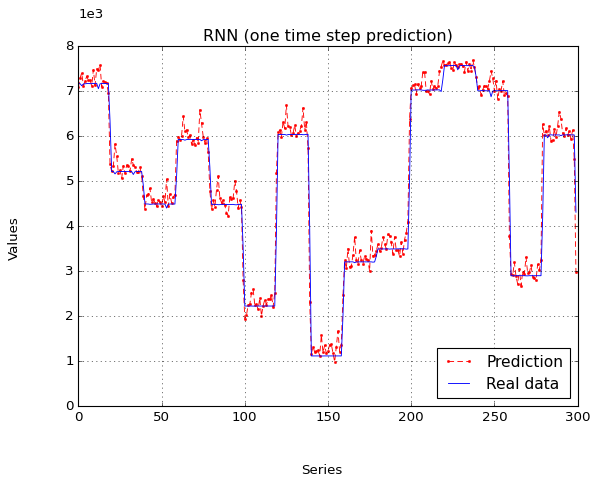

In [180]:
# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred_1_step[0:300], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test_np.tolist()[0:300], c='b',linestyle='-',linewidth = 0.8,label='Real data')
plt.title("RNN (one time step prediction)")

plt.legend(loc="lower right", fontsize=14)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()


# For the next 2 timestep prediction

In [108]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets_pcm/random_input_exp-7.csv')

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Columns: 169 entries, input_rate to packetsize
dtypes: float64(166), int64(1), object(2)
memory usage: 1.9+ MB


In [181]:
def create_sequences(features, target, N=1):
    X, y = [], []
    for i in range(len(features) - N):
        X.append(features.iloc[i:(i + N)].values)
        y.append(target.iloc[i + N])
    return np.array(X), np.array(y)

# Assuming 'corr_throughput' is a list of feature column names
features = data[corr_throughput]
target = data['output_rate'] 

N = 4
X, y = create_sequences(features, target, N)



In [182]:
def create_sequences(features, N=1):
    X_feature, y_feature = [], []
    for i in range(len(features) - N):
        X_feature.append(features.iloc[i:(i + N)].values)
        y_feature.append(features.iloc[i + N ].values)  
    return np.array(X_feature), np.array(y_feature)


features = data[corr_throughput] 
N = 4
X_feature, y_feature = create_sequences(features, N=4)


In [183]:
features.iloc[i + N].values
print(f'{y_feature[1]}')
print(f'\n')
print(f'{X_feature[1]}')

[1.60000e-01 2.37000e+00 1.65200e+01 2.00000e-03 6.20000e-01 8.14262e+03
 4.74000e+00 1.18570e+02 3.10000e-01 7.84000e+00 2.60000e+00 1.60000e-03
 5.00000e-01 4.44000e+00 4.10000e-01 2.68000e+00 2.42000e+00 2.20000e-03
 1.07748e+03 5.36000e+00 1.34060e+02 8.30000e-01 2.07400e+01 1.96860e+02
 3.80030e+02 5.76880e+02 2.31230e+02 2.28100e+02 4.59330e+02 4.73180e+02
 1.07840e+03 5.90740e+02 1.66914e+03]


[[1.50000e-01 2.34000e+00 1.53600e+01 2.00000e-03 6.40000e-01 7.73141e+03
  4.68000e+00 1.17000e+02 3.00000e-01 7.44000e+00 2.26000e+00 1.40000e-03
  4.60000e-01 4.42000e+00 3.90000e-01 2.53000e+00 2.28000e+00 2.30000e-03
  1.00978e+03 5.07000e+00 1.26630e+02 7.80000e-01 1.94300e+01 2.12500e+02
  4.19380e+02 6.31870e+02 2.26900e+02 2.24970e+02 4.51870e+02 4.65320e+02
  1.17635e+03 6.45330e+02 1.82167e+03]
 [1.50000e-01 2.31000e+00 1.55100e+01 2.00000e-03 6.30000e-01 7.73944e+03
  4.62000e+00 1.15420e+02 3.00000e-01 7.45000e+00 2.10000e+00 1.30000e-03
  4.40000e-01 4.39000e+00 3.90000e-01 

In [184]:
# Define the split point
split_point = int(len(X) * 0.7)  

# Split the data sequentially
X_train_feature = X_feature[:split_point]
X_test_feature = X_feature[split_point:]
y_train_feature = y_feature[:split_point]
y_test_feature = y_feature[split_point:]


In [185]:
np.shape(X_test_feature[1])

(4, 33)

In [186]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense



model_feature = Sequential() 
model_feature.add(LSTM(units=50, activation='relu', input_shape=(N,len(corr_throughput))))  
model_feature.add(Dense(len(corr_throughput)))  # Output layer for regression
model_feature.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_feature.fit(X_train_feature, y_train_feature, epochs=100, validation_split=0.2, verbose=1)



Epoch 1/100
125/125 [==============================] - 2s 7ms/step - loss: 2079752.8750 - val_loss: 1112218.6250
Epoch 2/100
125/125 [==============================] - 1s 5ms/step - loss: 204678.6250 - val_loss: 12214.2090
Epoch 3/100
125/125 [==============================] - 1s 6ms/step - loss: 6404.3662 - val_loss: 6240.2944
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 4648.9482 - val_loss: 5369.8481
Epoch 5/100
125/125 [==============================] - 1s 5ms/step - loss: 4240.0903 - val_loss: 5027.8452
Epoch 6/100
125/125 [==============================] - 1s 4ms/step - loss: 4033.5122 - val_loss: 4902.3457
Epoch 7/100
125/125 [==============================] - 1s 5ms/step - loss: 3911.5710 - val_loss: 4616.7437
Epoch 8/100
125/125 [==============================] - 1s 4ms/step - loss: 3732.1013 - val_loss: 4452.1689
Epoch 9/100
125/125 [==============================] - 1s 4ms/step - loss: 3623.9255 - val_loss: 4333.9829
Epoch 10/100
125/125 [======

Epoch 77/100
125/125 [==============================] - 1s 7ms/step - loss: 2921.9365 - val_loss: 3643.3921
Epoch 78/100
125/125 [==============================] - 1s 5ms/step - loss: 2888.8003 - val_loss: 3537.4993
Epoch 79/100
125/125 [==============================] - 1s 4ms/step - loss: 2919.5745 - val_loss: 3732.6309
Epoch 80/100
125/125 [==============================] - 1s 5ms/step - loss: 2884.3018 - val_loss: 3627.7253
Epoch 81/100
125/125 [==============================] - 1s 5ms/step - loss: 2931.5293 - val_loss: 3710.5542
Epoch 82/100
125/125 [==============================] - 1s 9ms/step - loss: 2892.9927 - val_loss: 3539.1841
Epoch 83/100
125/125 [==============================] - 1s 6ms/step - loss: 2886.9509 - val_loss: 3535.5947
Epoch 84/100
125/125 [==============================] - 1s 6ms/step - loss: 2854.2769 - val_loss: 4038.4802
Epoch 85/100
125/125 [==============================] - 1s 5ms/step - loss: 2864.8887 - val_loss: 3495.3218
Epoch 86/100
125/125 [======

In [188]:
#predicted_features = model_feature.predict(X_test_np[i].reshape(1, 3, 30))

# y_pred_1_step est base on X_test_np

y_pred_2_steps = []


for i in range(len(X_test_np)-1):  
   
    new_sequence = np.copy(X_test_np[i])
    predicted_features = model_feature.predict(X_test_feature[i].reshape(1, N, len(corr_throughput)))
    new_sequence = np.vstack([new_sequence[1:], predicted_features])
    
    new_sequence_reshaped = new_sequence.reshape(1, N, len(corr_throughput))
    
    y_pred_2_step = model.predict(new_sequence_reshaped)
    y_pred_2_steps.append(y_pred_2_step[0])

y_pred_2_steps = np.array(y_pred_2_steps)


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 15ms/step


In [189]:
#accuracy
threshold = 0.05 
y_true_shifted = y_test_np[1:] 
y_pred_2_steps_aligned = y_pred_2_steps[:len(y_true_shifted)]

distances = [abs(real - pred) / real for real, pred in zip(y_true_shifted.tolist(),y_pred_2_steps_aligned)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_true_shifted.tolist(), y_pred_2_steps_aligned)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf) 

Accuracy within 5% threshold: [70.68723703]
[array([0.]), array([86.39551192]), array([95.79242637]), array([97.942964]), array([99.06498364]), array([99.71949509]), array([99.76624591]), array([99.90649836]), array([99.95324918]), array([99.95324918]), array([100.])]


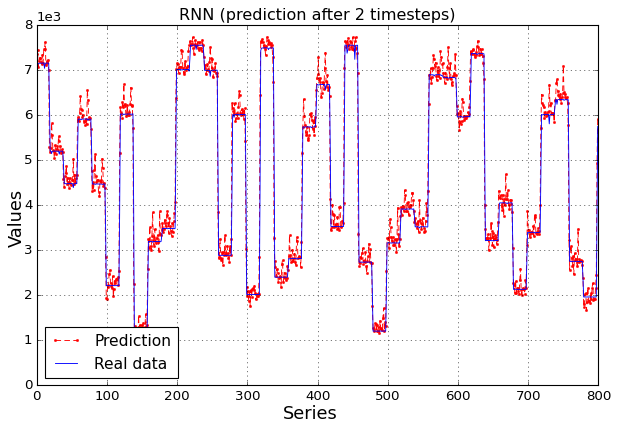

In [193]:
# plot

fig, ax = plt.subplots(facecolor='white', figsize=(9,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred_2_steps_aligned[0:800], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_true_shifted.tolist()[0:800], c='b',linestyle='-',linewidth = 0.8,label='Real data')
plt.title("RNN (prediction after 2 timesteps)")

plt.legend(loc="lower left", fontsize=14)
fig.text(0.5, 0.08, 'Series', size='16', ha='center')
fig.text(0.08, 0.5, 'Values', size='16', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.93, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()
